In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='darkgrid')

In [46]:
# data files
crashes = pd.read_csv('Crash_Data.csv', low_memory=False)
df=df_crashes
df_crashes.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [53]:
# Labels for the sections of our pie chart
labels = ["Vic", "NSW", "SA", "QLD", "ACT", "NT", "WA"]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100, 120, 110, 200]


colors = ["red", "orange", "lightcoral", "lightskyblue", "grey", "plum", "midnightblue"]


explode = (0.1, 0, 0, 0, 0, 0, 0)

([<matplotlib.patches.Wedge at 0x218c2b9b3d0>,
 [Text(0.26607898057334545, -1.170129042497899, 'Vic'),
  Text(1.057958069500526, -0.3012054501145695, 'NSW'),
  Text(1.0451959276725038, 0.34287821858032125, 'SA'),
  Text(0.6590921482573314, 0.8806801576653899, 'QLD'),
  Text(-0.11498131983694207, 1.093974083828568, 'ACT'),
  Text(-0.8519139889000915, 0.6958753879225326, 'NT'),
  Text(-1.026379577366586, -0.39565763377545005, 'WA')],
 [Text(0.15521273866778484, -0.6825752747904409, '23.8%'),
  Text(0.5770680379093778, -0.16429388188067426, '10.3%'),
  Text(0.5701068696395474, 0.18702448286199339, '8.6%'),
  Text(0.35950480814036256, 0.4803709950902126, '10.8%'),
  Text(-0.06271708354742293, 0.5967131366337644, '13.0%'),
  Text(-0.464680357581868, 0.37956839341229043, '11.9%'),
  Text(-0.5598434058363196, -0.2158132547866091, '21.6%')])

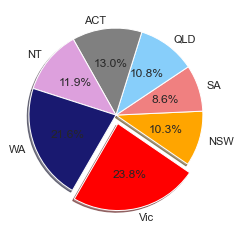

In [54]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)